In [486]:
import pandas as pd

df = pd.read_csv('../datasets/answers-normalized.csv')
df.head()

,area_formacao_ciencias_exatas,area_formacao_ciencias_humanas,area_formacao_outras,formacao_doutorado,formacao_mestrado,cor_raca_amarela,cor_raca_branca,cor_raca_indigena,cor_raca_mestico,cor_raca_nao_informada,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,0,1,0,1,0,0,1,0,0,0,...,10,10,10,10,10,10,10,10,10,10
1,0,0,1,1,0,0,1,0,0,0,...,8,9,8,9,9,10,10,10,10,10
2,0,0,1,0,1,0,1,0,0,0,...,10,10,10,10,10,10,10,10,10,10
3,0,1,0,0,1,0,1,0,0,0,...,9,9,9,7,5,8,7,2,9,7
4,0,1,0,1,0,0,1,0,0,0,...,10,7,10,10,10,10,10,10,9,10


In [487]:
df_clance = df.iloc[:, 23:43]
df_clance.head()

,clance_1,clance_2,clance_3,clance_4,clance_5,clance_6,clance_7,clance_8,clance_9,clance_10,clance_11,clance_12,clance_13,clance_14,clance_15,clance_16,clance_17,clance_18,clance_19,clance_20
0,3,4,4,4,4,5,5,5,3,3,3,5,5,5,4,4,5,4,1,3
1,3,2,4,3,3,2,5,4,1,5,1,4,1,4,4,2,4,4,2,4
2,2,2,4,4,3,1,2,1,1,3,2,1,1,4,1,1,4,2,5,2
3,5,5,5,5,3,5,5,5,1,5,3,3,5,5,3,1,3,5,5,2
4,3,3,2,1,2,2,1,1,1,1,1,1,3,3,5,1,3,4,5,4


<AxesSubplot:>

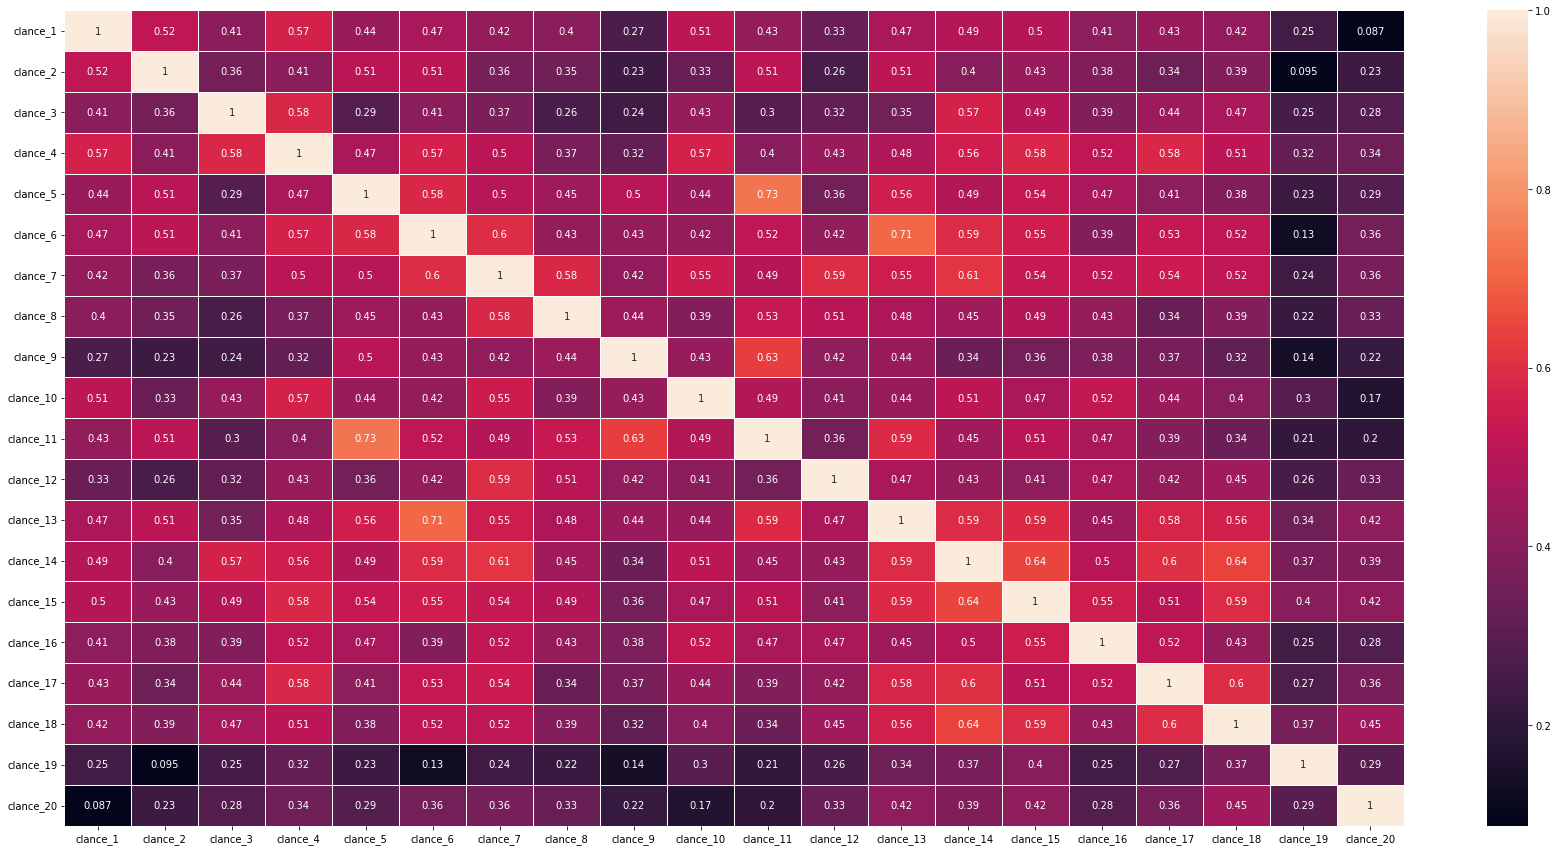

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_clance = df_clance.corr()

f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_clance, annot=True, linewidths=.5, ax=ax)

---

In [489]:
df_ae = df.iloc[:, 43:77]
df_ae.head()

,auto_eficacia_1,auto_eficacia_2,auto_eficacia_3,auto_eficacia_4,auto_eficacia_5,auto_eficacia_6,auto_eficacia_7,auto_eficacia_8,auto_eficacia_9,auto_eficacia_10,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,8,9,9,10,10,9,10,9,8,7,...,10,10,10,10,10,10,10,10,10,10
1,10,8,8,9,10,9,9,9,10,10,...,8,9,8,9,9,10,10,10,10,10
2,10,10,10,10,8,10,10,10,9,10,...,10,10,10,10,10,10,10,10,10,10
3,5,6,8,8,6,5,7,7,7,6,...,9,9,9,7,5,8,7,2,9,7
4,10,10,9,10,10,10,10,10,10,10,...,10,7,10,10,10,10,10,10,9,10


<AxesSubplot:>

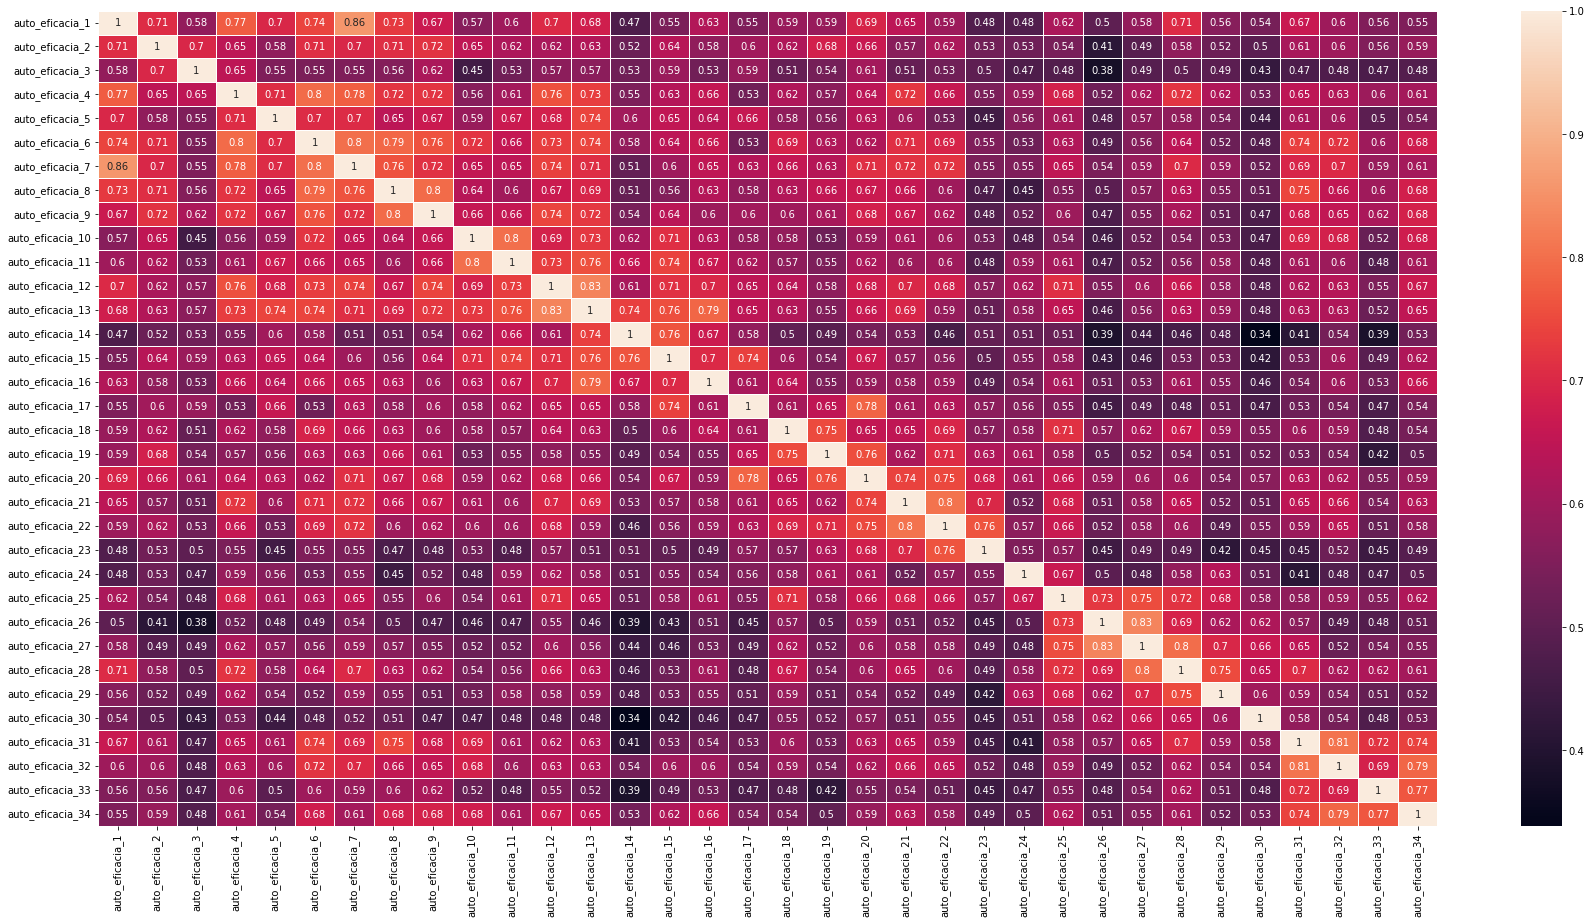

In [490]:
corr_clance = df_ae.corr()

f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_clance, annot=True, linewidths=.5, ax=ax)

# PCA
---

In [491]:
from sklearn.decomposition import PCA

pca = PCA(n_components=18)
scores_pca = pca.fit_transform(df_clance)

Text(0, 0.5, 'cumulative explained variance')

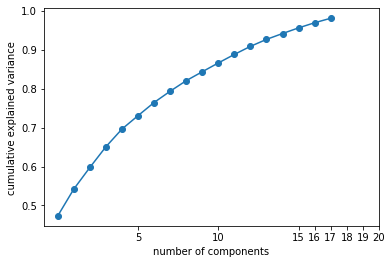

In [492]:
import numpy as np

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xticks([5, 10, 15, 16, 17, 18, 19, 20])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [493]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47324759, 0.54206489, 0.59756988, 0.65072259, 0.69612029,
       0.73053532, 0.76430681, 0.79320349, 0.82032947, 0.84321328,
       0.86583977, 0.88770625, 0.9084114 , 0.92628649, 0.94137029,
       0.95583766, 0.96905453, 0.98057595])

## StandardScaler

In [494]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df_clance)

In [495]:
pca = PCA(n_components=18)
pca.fit(X_std)
scores_pca_std = pca.transform(X_std)

Text(0, 0.5, 'cumulative explained variance')

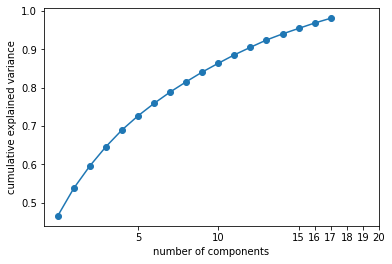

In [496]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xticks([5, 10, 15, 16, 17, 18, 19, 20])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [497]:
np.cumsum(pca.explained_variance_ratio_)

array([0.465734  , 0.53777247, 0.59592499, 0.64604216, 0.68962467,
       0.72640628, 0.75885843, 0.78844719, 0.81513893, 0.84054177,
       0.86341747, 0.88534289, 0.90498749, 0.92407811, 0.93986328,
       0.95413739, 0.96825614, 0.98069519])

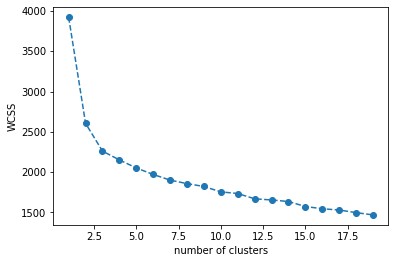

In [498]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(scores_pca_std)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

# reference here: https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [574]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scores_pca_std)
kmeans.labels_, kmeans.predict(scores_pca_std)

(array([2, 0, 1, 2, 1, 1, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 3, 0, 1, 2, 2, 2,
        1, 3, 2, 3, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 2, 1, 2, 3, 0, 3,
        1, 3, 2, 2, 0, 3, 1, 0, 3, 2, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1,
        3, 0, 0, 2, 2, 0, 2, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 3, 1,
        3, 0, 2, 3, 2, 2, 0, 3, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2,
        1, 2, 0, 3, 1, 1, 0, 1, 2, 0, 2, 3, 3, 2, 0, 3, 1, 0, 2, 2, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 3, 2, 0, 3, 0, 0, 0, 0, 0,
        2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 3, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2,
        3, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 2, 3, 0, 2, 2, 2, 2, 0, 2, 3, 2,
        2, 0], dtype=int32),
 array([2, 0, 1, 2, 1, 1, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 3, 0, 1, 2, 2, 2,
        1, 3, 2, 3, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 2, 1, 2, 3, 0, 3,
        1, 3, 2, 2, 0, 3, 1, 0, 3, 2, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1,
        3, 0, 0, 2, 2, 0, 2, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 3, 1,
        3

In [575]:
kmeans.labels_

array([2, 0, 1, 2, 1, 1, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 3, 0, 1, 2, 2, 2,
       1, 3, 2, 3, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 2, 1, 2, 3, 0, 3,
       1, 3, 2, 2, 0, 3, 1, 0, 3, 2, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 2, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 3, 1,
       3, 0, 2, 3, 2, 2, 0, 3, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2,
       1, 2, 0, 3, 1, 1, 0, 1, 2, 0, 2, 3, 3, 2, 0, 3, 1, 0, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 3, 2, 0, 3, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 3, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2,
       3, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 2, 3, 0, 2, 2, 2, 2, 0, 2, 3, 2,
       2, 0], dtype=int32)

In [576]:
df_clance.sum(axis=1)

0      79
1      62
2      46
3      79
4      47
       ..
195    80
196    40
197    76
198    90
199    63
Length: 200, dtype: int64